#**Búsqueda de Conjuntos de Datos:**
* Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
* Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

# Dataset

* [Supermarket sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?select=supermarket_sales+-+Sheet1.csv)

# **Análisis Exploratorio de Datos (EDA) Inicial:**
* Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
* Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
* Documentar los hallazgos de cada EDA en un notebook de Jupyter.

# EDA Dataset I

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aungpyaeap/supermarket-sales")

print("Path to dataset files:", path)

100%|██████████| 35.9k/35.9k [00:00<00:00, 32.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aungpyaeap/supermarket-sales/versions/3


In [2]:
import pandas as pd
# Ruta de archivo CSV
data = pd.read_csv(path + "/supermarket_sales - Sheet1.csv")
# Mostrar registros
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
# hacer una copia del dato original
df = data.copy()
# Datos nulos
df.isna().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [4]:
# Contar los valos unicos de df
df.nunique()

,0
Invoice ID,1000
Branch,3
City,3
Customer type,2
Gender,2
Product line,6
Unit price,943
Quantity,10
Tax 5%,990
Total,990


In [5]:
#Extraer información de fecha en Día, Mes, Año
df['Date'] = pd.to_datetime(data['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [6]:
# Eliminar datos no representativos
df = df.drop(['Invoice ID', 'Tax 5%', 'Date', 'Time', 'Rating', 'gross margin percentage'], axis=1)

In [7]:
# Mostrar DF
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,gross income,Day,Month,Year
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,522.83,26.1415,5,1,2019
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,76.40,3.8200,8,3,2019
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,324.31,16.2155,3,3,2019
3,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,465.76,23.2880,27,1,2019
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,604.17,30.2085,8,2,2019


In [8]:
# Informacion de DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Total          1000 non-null   float64
 8   Payment        1000 non-null   object 
 9   cogs           1000 non-null   float64
 10  gross income   1000 non-null   float64
 11  Day            1000 non-null   int32  
 12  Month          1000 non-null   int32  
 13  Year           1000 non-null   int32  
dtypes: float64(4), int32(3), int64(1), object(6)
memory usage: 97.8+ KB


In [9]:
# Columnas númericas y categoricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [10]:
# Convertir columnas categoricas a tipo 'category'
df[categorical_cols] = df[categorical_cols].astype('category')

In [11]:
# Contar datos duplicardos
df.duplicated().sum()

0

In [12]:
# Valores unicos de columnas categoricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()

Valores únicos en la columna 'Branch':
['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']

Valores únicos en la columna 'City':
['Yangon', 'Naypyitaw', 'Mandalay']
Categories (3, object): ['Mandalay', 'Naypyitaw', 'Yangon']

Valores únicos en la columna 'Customer type':
['Member', 'Normal']
Categories (2, object): ['Member', 'Normal']

Valores únicos en la columna 'Gender':
['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Valores únicos en la columna 'Product line':
['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']
Categories (6, object): ['Electronic accessories', 'Fashion accessories', 'Food and beverages',
                         'Health and beauty', 'Home and lifestyle', 'Sports and travel']

Valores únicos en la columna 'Payment':
['Ewallet', 'Cash', 'Credit card']
Categories (3, object): ['Cash', 'Credit card', 'Ewallet']



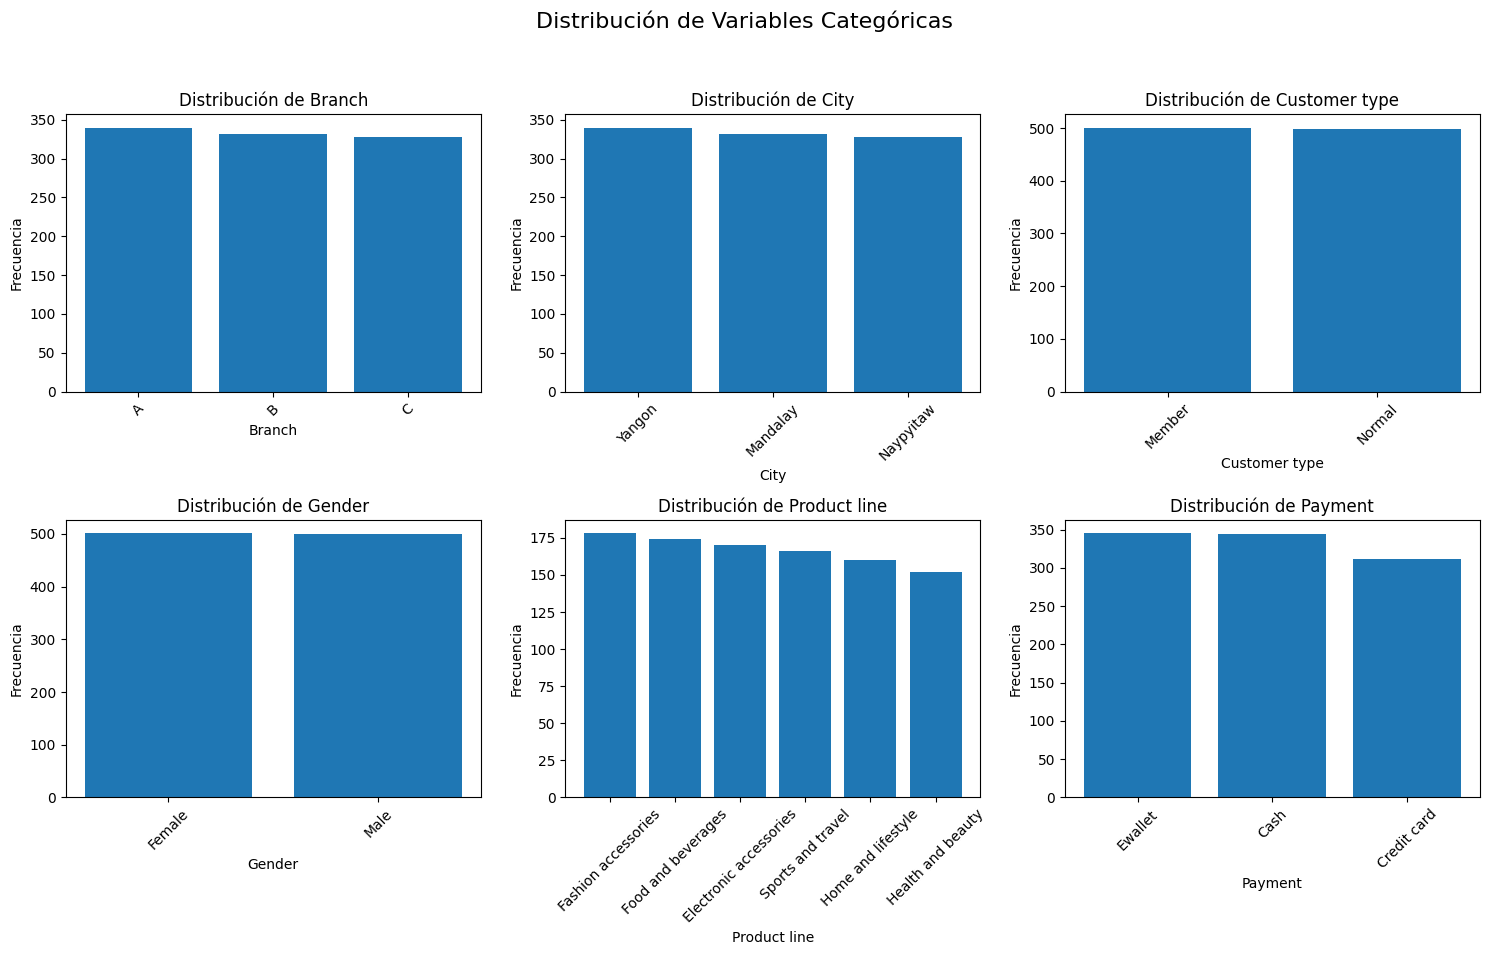

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determinar el número de filas y columnas para los subplots
num_cols = 3  # Número de columnas en la cuadrícula de subplots
num_rows = (len(categorical_cols) + 1) // num_cols  # Calcula el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Distribución de Variables Categóricas", fontsize=16)

# Aplanar el arreglo de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    value_counts = df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis='x', rotation=45)

# Eliminar cualquier subplot vacío si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [14]:
# contador de columna Month
df['Month'].value_counts()

,count
Month,
1,352
3,345
2,303


In [15]:
# Contador de generos
df['Gender'].value_counts()

,count
Gender,
Female,501
Male,499


In [16]:
# Contador de genero y tipos de pago
df[['Gender','Payment']].value_counts(ascending=True).to_dict()

{('Male', 'Credit card'): 148,
 ('Female', 'Ewallet'): 160,
 ('Female', 'Credit card'): 163,
 ('Male', 'Cash'): 166,
 ('Female', 'Cash'): 178,
 ('Male', 'Ewallet'): 185}

<ipython-input-17-ef0adebf116b>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_payment_counts = df.groupby(['Gender', 'Payment']).size().reset_index(name='Counts')


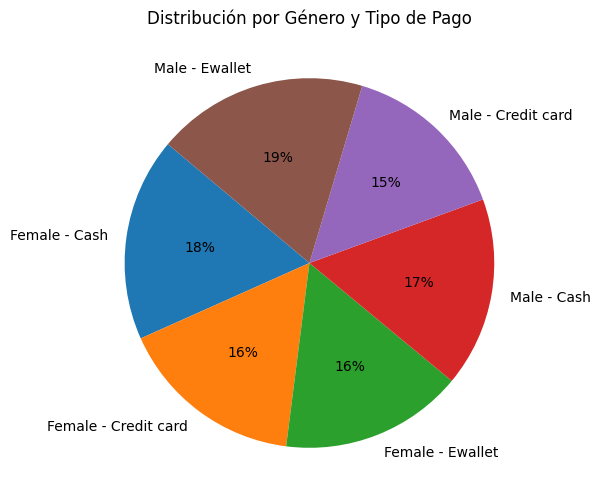

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar combinaciones de Gender y Payment
gender_payment_counts = df.groupby(['Gender', 'Payment']).size().reset_index(name='Counts')

# Preparar datos para el gráfico
labels = [f"{row['Gender']} - {row['Payment']}" for _, row in gender_payment_counts.iterrows()]
sizes = gender_payment_counts['Counts']

# Crear gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.0f%%', startangle=140)
plt.title('Distribución por Género y Tipo de Pago')
plt.show()

In [18]:
# Descripcion de datos númericos
df.describe()

,Unit price,Quantity,Total,cogs,gross income,Day,Month,Year
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,322.966749,307.58738,15.379369,15.256000,1.993000,2019.0
std,26.494628,2.923431,245.885335,234.17651,11.708825,8.693563,0.835254,0.0
min,10.080000,1.000000,10.678500,10.17000,0.508500,1.000000,1.000000,2019.0
25%,32.875000,3.000000,124.422375,118.49750,5.924875,8.000000,1.000000,2019.0
50%,55.230000,5.000000,253.848000,241.76000,12.088000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,471.350250,448.90500,22.445250,23.000000,3.000000,2019.0
max,99.960000,10.000000,1042.650000,993.00000,49.650000,31.000000,3.000000,2019.0


              Unit price  Quantity     Total      cogs  gross income
Unit price      1.000000  0.010778  0.633962  0.633962      0.633962
Quantity        0.010778  1.000000  0.705510  0.705510      0.705510
Total           0.633962  0.705510  1.000000  1.000000      1.000000
cogs            0.633962  0.705510  1.000000  1.000000      1.000000
gross income    0.633962  0.705510  1.000000  1.000000      1.000000


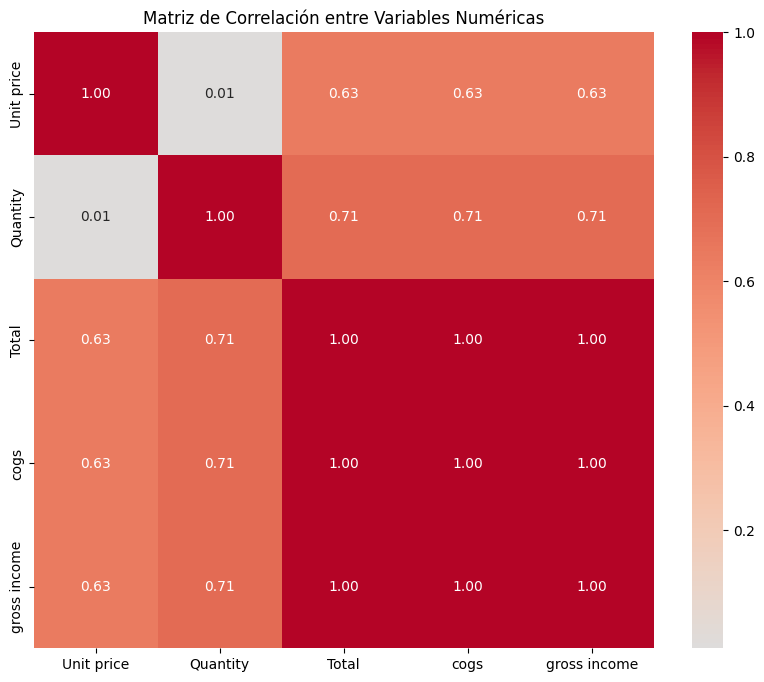

In [19]:
# Correlación de los datos numéricos
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [20]:
# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df, numerical_cols)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 9
Porcentaje de outliers: 0.90%


In [21]:
# Filtrar el DataFrame sin outliers
df_no_outliers = df.drop(index=outlier_indices)
print(f"Tamaño del DataFrame con outliers: {df.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")

Tamaño del DataFrame con outliers: (1000, 14)
Tamaño del DataFrame sin outliers: (991, 14)


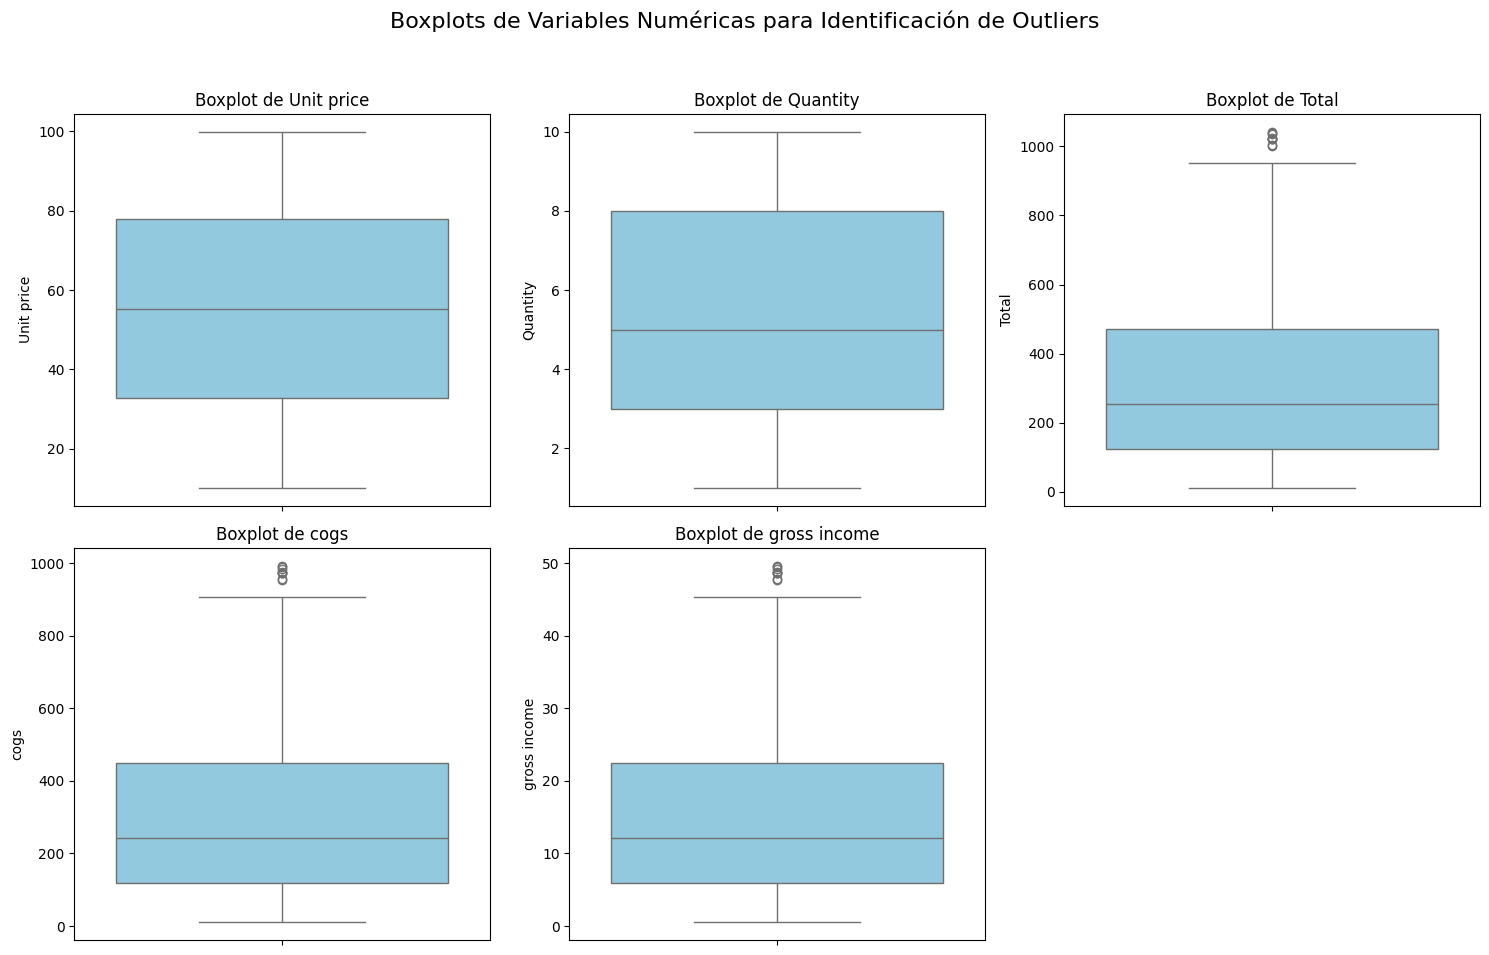

In [22]:
# Definir el tamaño del gráfico y la cuadrícula de subplots
num_cols = 3  # Número de columnas de subplots
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Número de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Boxplots de Variables Numéricas para Identificación de Outliers", fontsize=16)

# Aplanar los ejes para iterar más fácilmente
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax, color='skyblue')
    ax.set_title(f"Boxplot de {col}")

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el espaciado para el título principal
plt.show()

In [23]:
# Filtrar el DataFrame sin outliers
df = df.drop(index=outlier_indices)

In [24]:
# Información de los datos limpios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Branch         991 non-null    category
 1   City           991 non-null    category
 2   Customer type  991 non-null    category
 3   Gender         991 non-null    category
 4   Product line   991 non-null    category
 5   Unit price     991 non-null    float64 
 6   Quantity       991 non-null    int64   
 7   Total          991 non-null    float64 
 8   Payment        991 non-null    category
 9   cogs           991 non-null    float64 
 10  gross income   991 non-null    float64 
 11  Day            991 non-null    int32   
 12  Month          991 non-null    int32   
 13  Year           991 non-null    int32   
dtypes: category(6), float64(4), int32(3), int64(1)
memory usage: 64.7 KB


#**Diagnóstico y Selección de Problema:**
* Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
* Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
* Justificar la elección del problema y explicar por qué es relevante y desafiante.

# Dataset I

**Diagnóstico:**
* Este conjunto de datos contiene información detallada sobre las ventas, incluyendo la categoría de producto, método de pago y el monto total de cada venta.
* Desafíos: Existen patrones complejos entre la categoría del producto y el método de pago que pueden afectar el volumen y monto de ventas. También puede haber estacionalidad en las ventas según la fecha.

**Problema Seleccionado:**
* Regresión para predecir el monto total de ventas.

**Justificación:**
* La predicción del monto total de ventas en función de factores como la categoría del producto y el método de pago es útil para gestionar el inventario y diseñar estrategias de marketing.
* Este problema es desafiante porque involucra analizar relaciones entre múltiples variables y potencialmente incluye factores estacionales que afectan las ventas.